## Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_excel('IDataset1.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

[[0.0 1.0 0.5 1.5]
 [0.0 1.0 0.5 2.5]
 [0.0 1.0 0.5 3.5]
 ...
 [1.0 0.0 25.0 18.0]
 [1.0 0.0 25.0 19.0]
 [1.0 0.0 25.0 20.0]]


## Alternative processing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

# Importing the dataset
dataset = pd.read_excel('IDataset1.xlsx')
X = dataset[['Charge_type', 'Charge_size', 'Standoff_distance']]
y = dataset['Incident_pressure']
feature_names = X.columns
print (X)

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Charge_type'])], remainder='passthrough')
X = ct.fit_transform(X)

#Getting the feature names
new_feature_names = ct.get_feature_names_out(feature_names)
print (new_feature_names)
print (X)

#Turning back into a dataframe
X = pd.DataFrame(X, columns= new_feature_names)
print (X)


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
print (X_train)

    Charge_type  Charge_size  Standoff_distance
0           TNT          0.5                1.5
1           TNT          0.5                2.5
2           TNT          0.5                3.5
3           TNT          0.5                4.5
4           TNT          0.5                5.5
..          ...          ...                ...
541       CompB         25.0               16.0
542       CompB         25.0               17.0
543       CompB         25.0               18.0
544       CompB         25.0               19.0
545       CompB         25.0               20.0

[546 rows x 3 columns]
['encoder__Charge_type_CompB' 'encoder__Charge_type_TNT'
 'remainder__Charge_size' 'remainder__Standoff_distance']
[[ 0.   1.   0.5  1.5]
 [ 0.   1.   0.5  2.5]
 [ 0.   1.   0.5  3.5]
 ...
 [ 1.   0.  25.  18. ]
 [ 1.   0.  25.  19. ]
 [ 1.   0.  25.  20. ]]
     encoder__Charge_type_CompB  encoder__Charge_type_TNT  \
0                           0.0                       1.0   
1                  

## Calling the Random Forest Regressor

In [3]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 67)

## Applying Grid Search to find the best model and the best parameters

In [4]:
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20],
               'min_samples_split': [2, 3, 4],
               'min_samples_leaf': [1, 2, 3, 4],
               'n_estimators' : [5, 10, 25, 50, 100, 200]}]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

Best Accuracy: 0.9745398391407594
Best Parameters: {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


## Training the Decision Tree Regression model on the Training set

In [4]:
regressor = RandomForestRegressor(n_estimators = 50,
                                  max_depth = 14,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 67)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, n_estimators=50, random_state=67)

## Save the model to disk

In [5]:
filename = 'finalized_model_XGB.sav'
pickle.dump(regressor, open(filename, 'wb'))

## Create a KFold object with 5 splits 

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=folds)
print (scores)
print (scores.mean())
regressor

[0.96835603 0.99079025 0.9910062  0.93985226 0.98269445]
0.9745398391407594


RandomForestRegressor(max_depth=14, n_estimators=50, random_state=67)

## Load the model from disk

In [ ]:
loaded_regressor = pickle.load(open(filename, 'rb'))

## Predicting the Test set results

In [8]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
file = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1)
print(file)

[[ 21.54  20.56]
 [341.62 323.97]
 [114.18 114.25]
 [ 94.78  74.26]
 [280.13 293.22]
 [132.96 136.86]
 [ 96.56  99.  ]
 [133.76 138.  ]
 [353.14 385.24]
 [103.48 103.36]
 [161.87 148.77]
 [237.85 239.61]
 [ 89.51  90.43]
 [ 37.11  33.86]
 [189.01 170.01]
 [ 30.76  27.91]
 [ 62.04  61.02]
 [ 34.26  22.34]
 [ 31.61   3.04]
 [ 69.36  71.26]
 [368.71 377.38]
 [ 80.6   79.63]
 [ 70.48  73.54]
 [ 41.22  40.54]
 [206.54 204.93]
 [ 30.71  28.38]
 [175.04 159.3 ]
 [ 74.53  74.79]
 [108.09 103.92]
 [ 59.76  65.63]
 [167.12 164.29]
 [ 58.54  52.29]
 [ 51.51  48.96]
 [  5.74   5.49]
 [151.32 151.27]
 [ 54.8   54.48]
 [108.77  96.38]
 [105.94 105.61]
 [ 61.15  64.6 ]
 [ 97.86  97.63]
 [ 51.4   51.99]
 [ 93.86  95.93]
 [271.81 271.69]
 [119.73 118.52]
 [156.96 142.84]
 [126.8  124.71]
 [132.72 135.44]
 [ 26.3   24.41]
 [ 18.41  17.94]
 [344.45 367.34]
 [ 50.43  49.1 ]
 [134.73 136.91]
 [ 68.7   67.7 ]
 [218.35 202.75]
 [334.73 343.73]
 [ 87.9   85.17]
 [174.69 172.47]
 [177.76 179.97]
 [ 15.66  15.0

## SHAP

In [9]:
import shap
print (shap.__version__)

0.41.0


In [10]:
# Create object that can calculate shap values for an ensemble tree model
explainer = shap.TreeExplainer(regressor)

In [11]:
# Calculate Shap values
shap_values = explainer.shap_values(X_train)

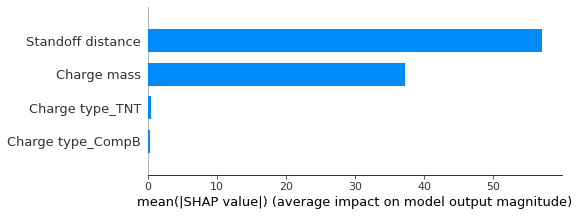

None


<Figure size 1440x360 with 0 Axes>

In [12]:
#Summary plot type 1
features = ['Charge type_CompB', 'Charge type_TNT', 'Charge mass', 'Standoff distance']
shap.summary_plot(shap_values, X_train, feature_names = features, plot_type="bar")
print (plt.gcf().set_size_inches(20,5))

[1]
labels ['']


Text(482.5464500000001, 0.5, 'Feature value')

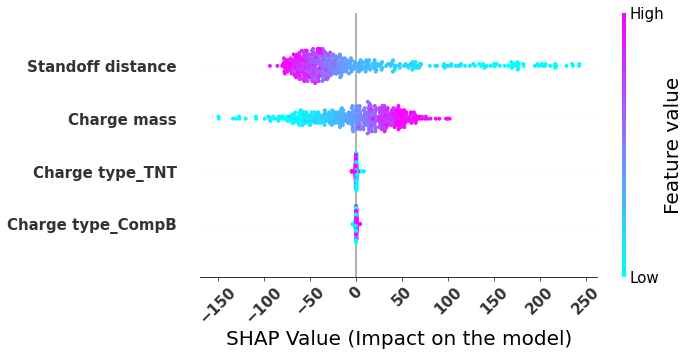

In [13]:
#Summary plot type 2
features = ['Charge type_CompB', 'Charge type_TNT', 'Charge mass', 'Standoff distance']
shap.summary_plot(shap_values, X_train, feature_names=features, show=False,cmap = "cool")
# Get the current figure and axes objects.
fig = plt.gcf()
print (plt.get_fignums())
print ("labels",plt.get_figlabels())
plt.gcf().set_size_inches(10,5)
plt.xlabel("SHAP Value (Impact on the model)", fontsize=20)
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
#plt.xlim([-3000,7000])
plt.xticks(rotation=45)
#cb = plt.colorbar()
#cb.set_ticks([2,19])

# Get colorbar
cb_ax = fig.axes[1] 

# Modifying color bar parameters
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel("Feature value", fontsize=20)
#cb_ax.set_aspect(aspect = 1)
#print (cb_ax.get_xlim())
#print (cb_ax.get_ylim())
#print (cb_ax.get_xbound())
#print (cb_ax.get_ybound())
#cb_ax.set_xlim(0,0.0001)

#cb.set_xticklabels(['Low', 'High'])
#ax.cb.set_label("Feature Values",fontsize = 20)

AttributeError: 'function' object has no attribute 'info'

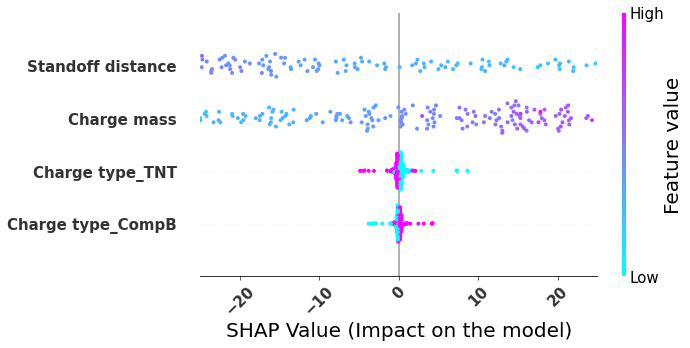

In [14]:
#Summary plot type 3
shap.summary_plot(shap_values, X_train, feature_names=features, show=False,cmap = "cool")
# Get the current figure and axes objects.
fig = plt.gcf()
plt.gcf().set_size_inches(10,5)
plt.xlabel("SHAP Value (Impact on the model)", fontsize=20)
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
plt.xlim([-25,25])
plt.xticks(rotation=45)

# Get colorbar
cb_ax = fig.axes[1] 

# Modifying color bar parameters
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel("Feature value", fontsize=20)
shap.summary_plot.info()

(array([280.13, 280.13]),
 [Text(280.12598876639936, 1, '$f(x)$'),
  Text(280.12598877639937, 1, '$ = 280.126$')])

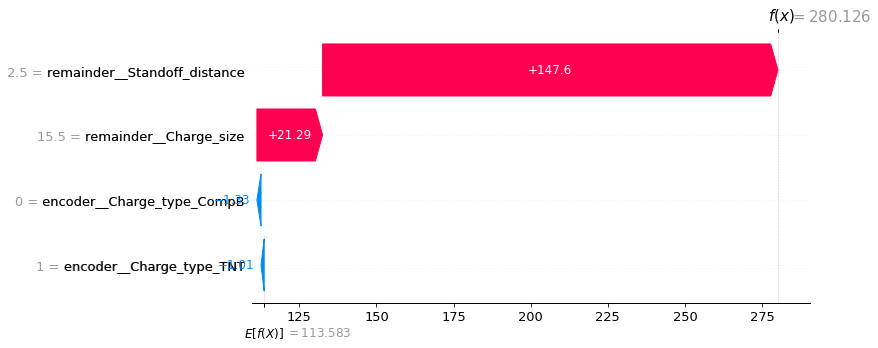

In [15]:
#print (X_test)
features = ['Charge type_CompB', 'Charge type_TNT', 'Charge mass', 'Standoff distance']
#print (X_test)
#Waterfall Plot (for an instance)
explainer2 = shap.Explainer(regressor.predict, X_test)
#X_test.columns=features
shap_values2 = explainer2(X_test)

shap.waterfall_plot(shap_values2[4], show=False)
#plt.gcf()
#print (plt.get_fignums())


plt.gcf().set_size_inches(10,5)
plt.xticks(fontsize = 15,weight='bold')

.values =
array([  0.26,   0.3 , -35.75, -47.68])

.base_values =
113.58330802386115

.data =
array([ 1.,  0.,  4., 15.])

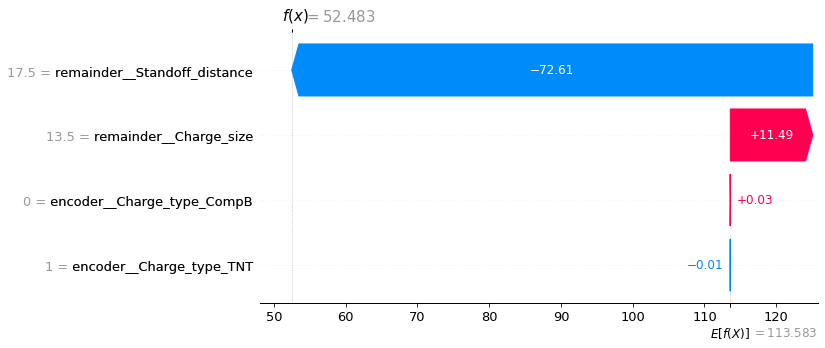

In [24]:
shap.waterfall_plot(shap_values2[97], show=False)
plt.gcf().set_size_inches(10,5)
plt.xticks(fontsize = 15,weight='bold')
shap_values2[25]

(array([174.69, 174.69]),
 [Text(174.6919482403997, 1, '$f(x)$'),
  Text(174.69194825039972, 1, '$ = 174.692$')])

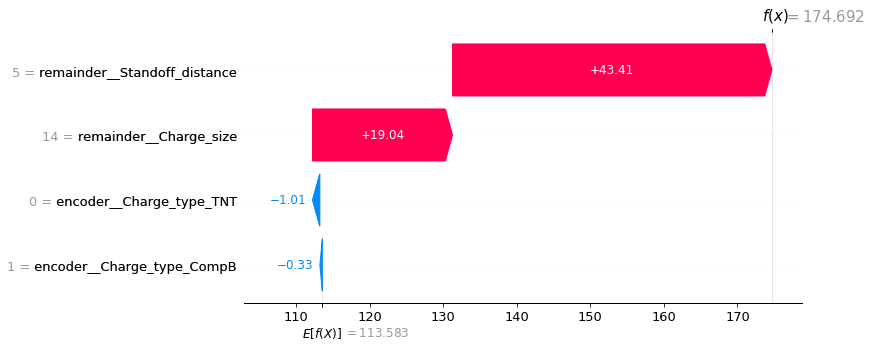

In [17]:
shap.waterfall_plot(shap_values2[56], show=False)
plt.gcf().set_size_inches(10,5)
plt.xticks(fontsize = 15,weight='bold')

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

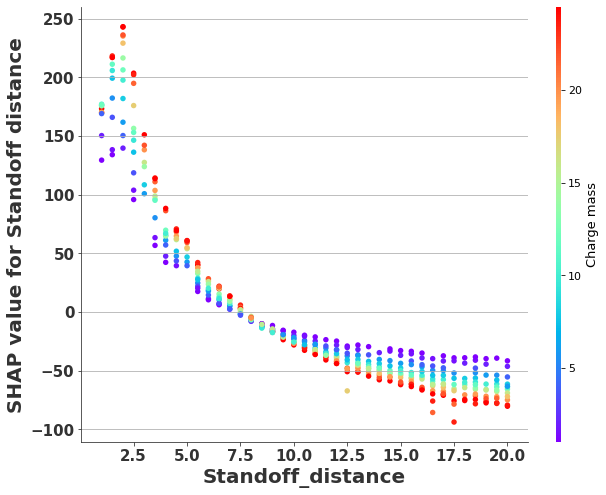

In [19]:
#Partial Dependenace Plot
shap.dependence_plot(3, shap_values, X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Standoff distance", fontsize = 20,weight='bold')
plt.xlabel("Standoff_distance",fontsize = 20,weight='bold')
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
plt.grid (visible = True, which = 'major', axis = 'y')
plt.colorbar(fontsize = 15)

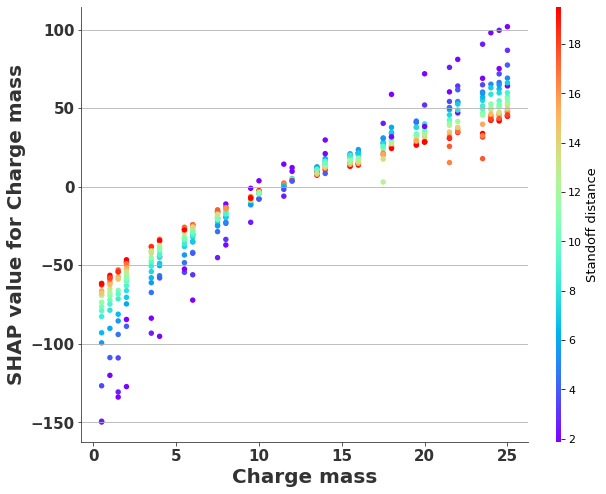

In [20]:
#Partial Dependenace Plot
shap.dependence_plot(2, shap_values, X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Charge mass", fontsize = 20,weight='bold')
plt.xlabel("Charge mass",fontsize = 20,weight='bold')
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
plt.grid (visible = True, which = 'major', axis = 'y')

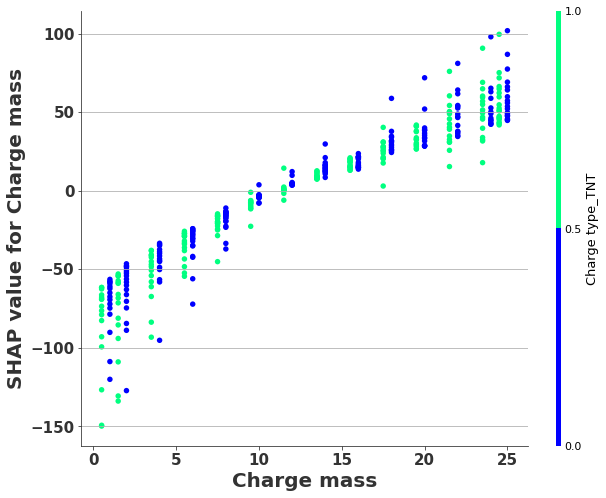

In [22]:
#Partial Dependenace Plot
shap.dependence_plot(2, shap_values, X_train, feature_names = features, interaction_index = 1, show=False, dot_size = 30, cmap=plt.get_cmap("winter"))
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Charge mass", fontsize = 20,weight='bold')
plt.xlabel("Charge mass",fontsize = 20,weight='bold')
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
plt.grid (visible = True, which = 'major', axis = 'y')